## Import

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import collections
import logging
import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import core.artificial_signal_generators as sig_gen
import core.plotting as plot
import core.signal_processing as sigp
import core.statistics as stats
import helpers.dbg as dbg
import helpers.env as env
import helpers.printing as prnt

/wd/paul/src/commodity_research/amp/core/explore.py:28: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdm


In [2]:
dbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", env.get_system_signature()[0])

prnt.config_notebook()

# Packages
         python: 3.7.6
         joblib: 0.14.1
          numpy: 1.18.1
         pandas: 1.0.3
        pyarrow: 0.16.0
          scipy: 1.4.1
        seaborn: 0.10.0
        sklearn: 0.22.2.post1
    statsmodels: 0.11.1
# Last commits:
  *   19c814c Paul     Merge pull request #253 from alphamatic/PartTask546_Implement_outlier_handling_change_defaults (24 minutes ago) Fri May 8 00:15:12 2020  (HEAD -> master, origin/master, origin/HEAD)
  |\  
  * \   9f0cacf Paul     Merge pull request #254 from alphamatic/PartTask2232_Update_signal_processing_lib3 (   3 hours ago) Thu May 7 21:35:00 2020           
  |\ \  
  | * | f2a46fb paul     Shorten tests                                                     (   3 hours ago) Thu May 7 21:30:34 2020  (origin/PartTask2232_Update_signal_processing_lib3, PartTask2232_Update_signal_processing_lib3)


# Generate signal

In [3]:
arma00process = sig_gen.ArmaProcess([], [])

In [4]:
rets = arma00process.generate_sample(
    {"start": "2000-01-01", "periods": 4*252, "freq": "B"},
    scale=5,
    burnin=20,
    seed=42
)

In [5]:
price = rets.cumsum()

In [6]:
rets.name += "_rets"
price.name += "_price"

## Price

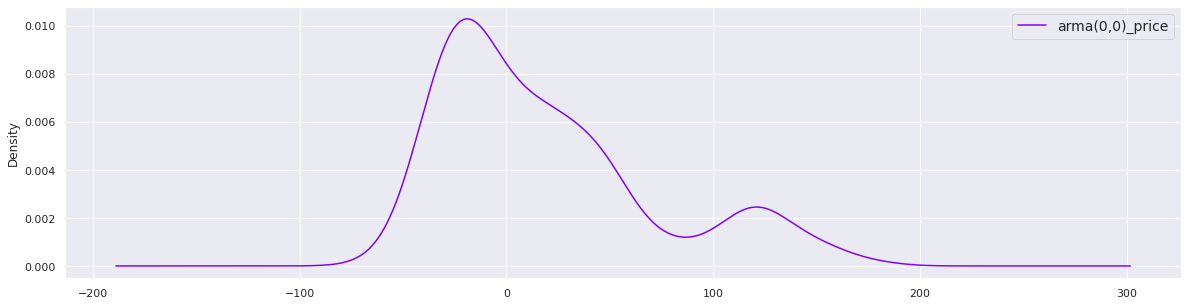

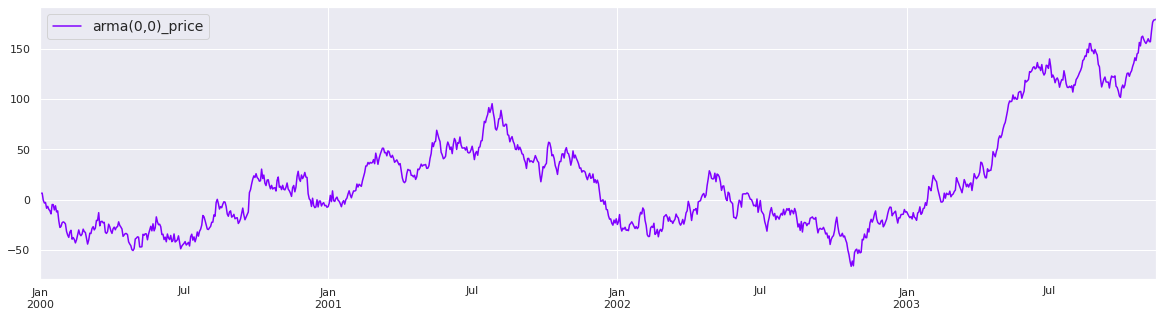

In [7]:
plot.plot_cols(price)

### Price wavelet decomposition

In [8]:
price_smooth, price_detail = sigp.get_swt(price, wavelet="haar")

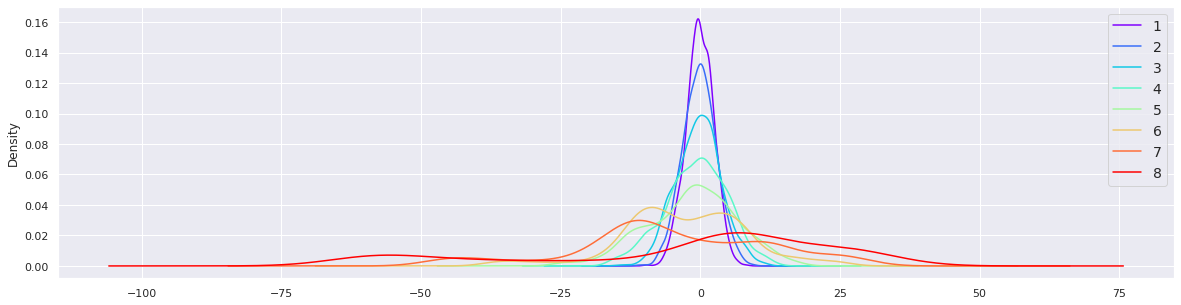

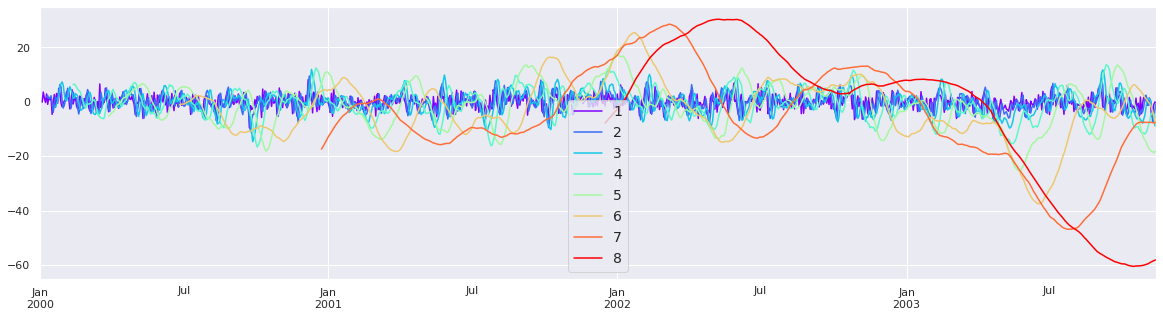

In [9]:
plot.plot_cols(price_detail)

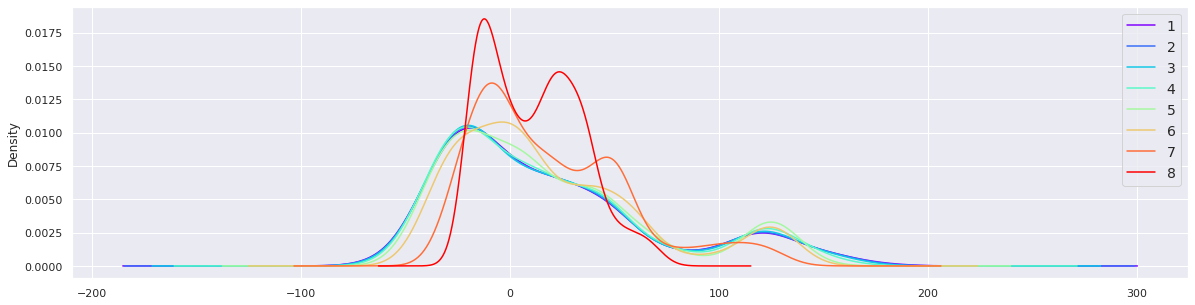

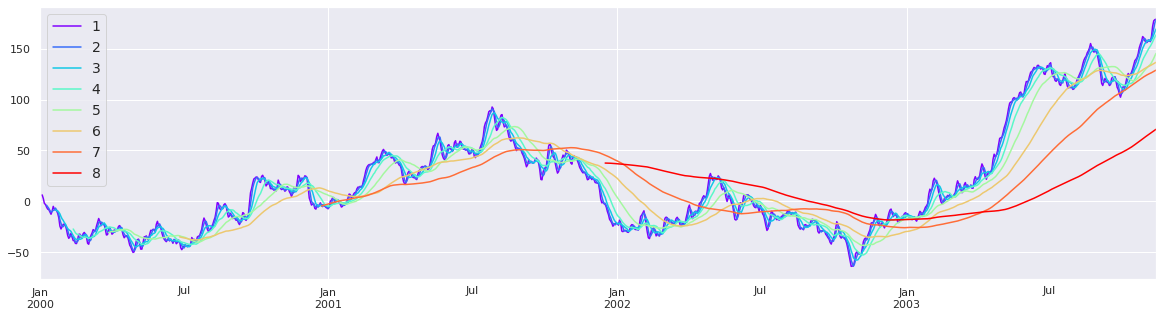

In [10]:
plot.plot_cols(price_smooth)

,1,2,3,4,5,6,7,8
1,1.000000,0.405594,0.143507,0.063213,0.020896,0.006878,0.024528,0.044889
2,0.405594,1.000000,0.483652,0.189960,0.067866,0.022118,0.043760,0.073768
3,0.143507,0.483652,1.000000,0.521925,0.193018,0.063128,0.074433,0.098897
4,0.063213,0.189960,0.521925,1.000000,0.536515,0.176401,0.129233,0.122497
5,0.020896,0.067866,0.193018,0.536515,1.000000,0.511171,0.245264,0.155337
6,0.006878,0.022118,0.063128,0.176401,0.511171,1.000000,0.583998,0.241688
7,0.024528,0.043760,0.074433,0.129233,0.245264,0.583998,1.000000,0.648722
8,0.044889,0.073768,0.098897,0.122497,0.155337,0.241688,0.648722,1.000000


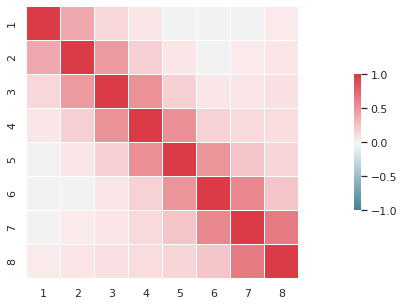

In [11]:
plot.plot_correlation_matrix(price_detail, mode="heatmap")

## Returns

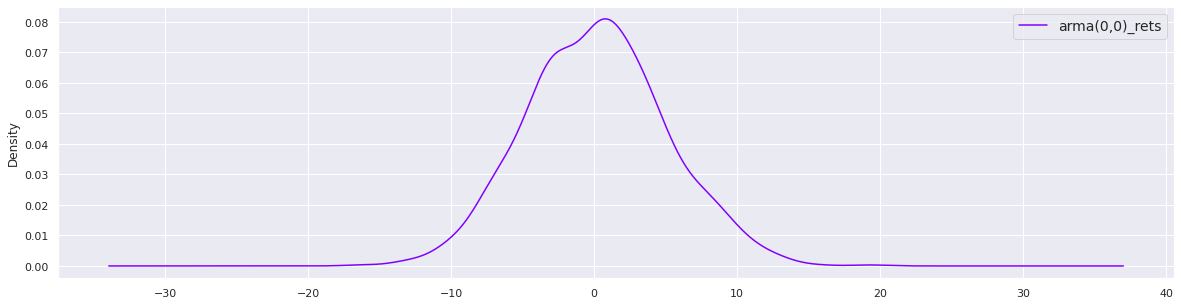

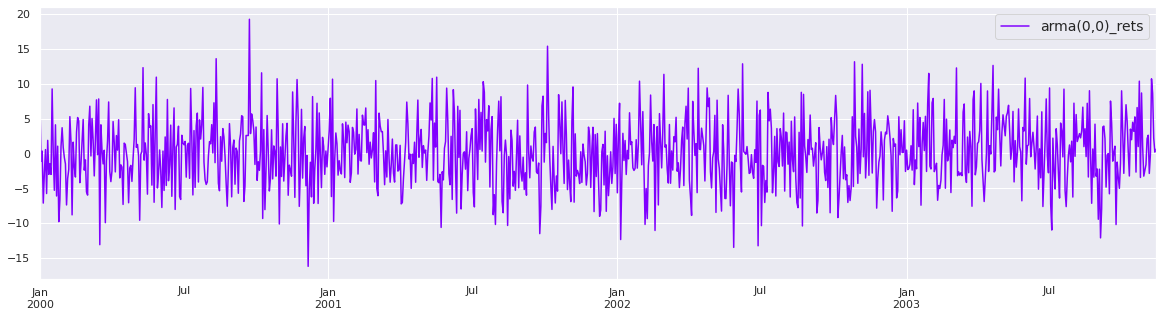

In [12]:
plot.plot_cols(rets)

In [13]:
stats.apply_normality_test(rets.to_frame())

,"arma(0,0)_rets"
statistic,2.487126
pvalue,0.288355


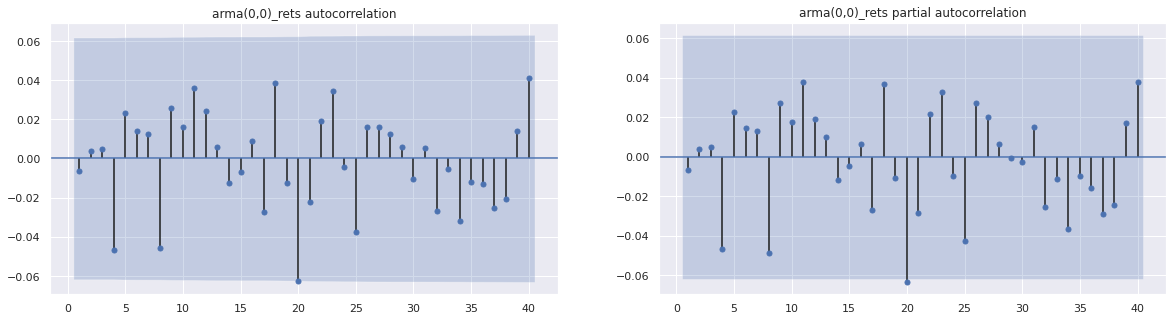

In [14]:
plot.plot_autocorrelation(rets)

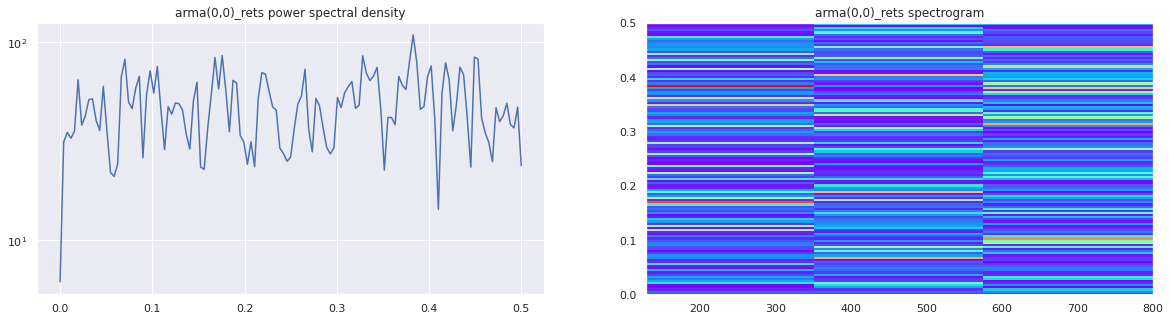

In [15]:
plot.plot_spectrum(rets)

### Returns wavelet decomposition

In [16]:
rets_smooth, rets_detail = sigp.get_swt(rets, "haar")

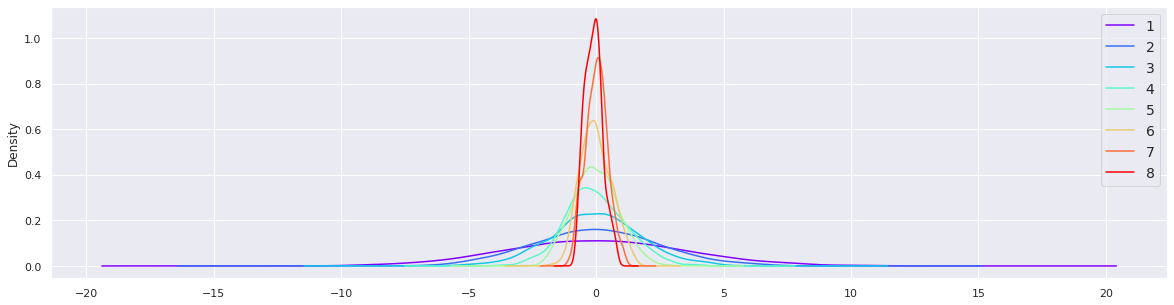

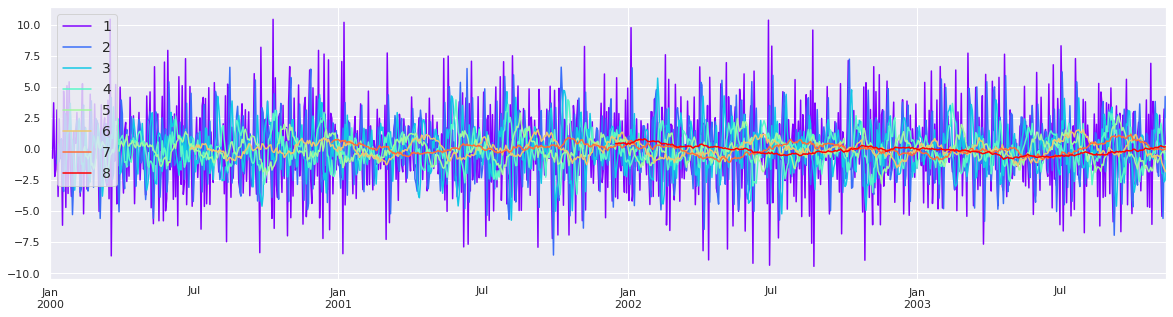

In [17]:
plot.plot_cols(rets_detail)

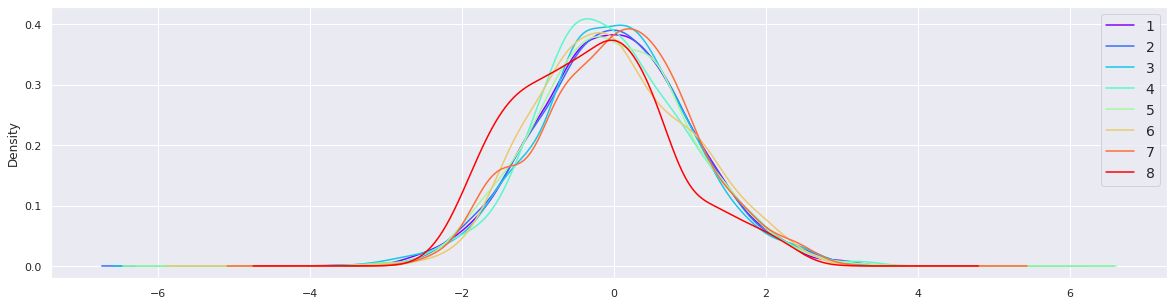

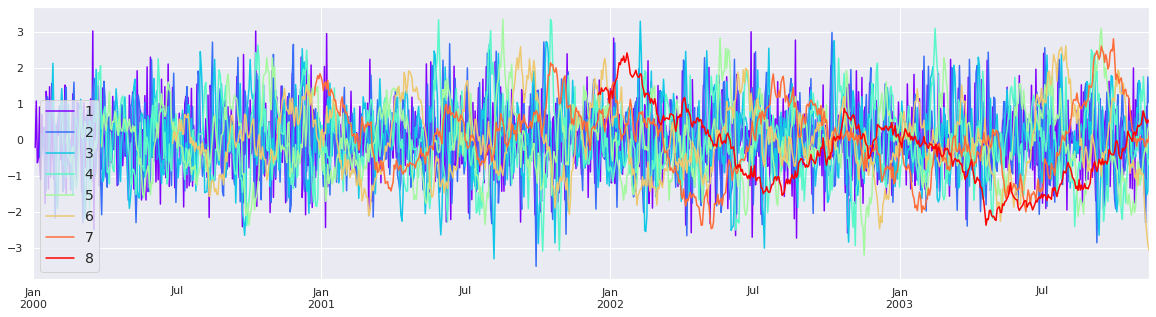

In [18]:
plot.plot_cols(rets_detail, mode="renormalize")

In [19]:
stats.apply_normality_test(rets_detail)

,1,2,3,4,5,6,7,8
statistic,1.129077,0.509128,1.645173,10.292071,4.054384,12.412431,3.587151,11.66575
pvalue,0.568622,0.775254,0.439294,0.005822,0.131705,0.002017,0.166364,0.00293


/wd/paul/.conda/envs/p1_develop/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/wd/paul/.conda/envs/p1_develop/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


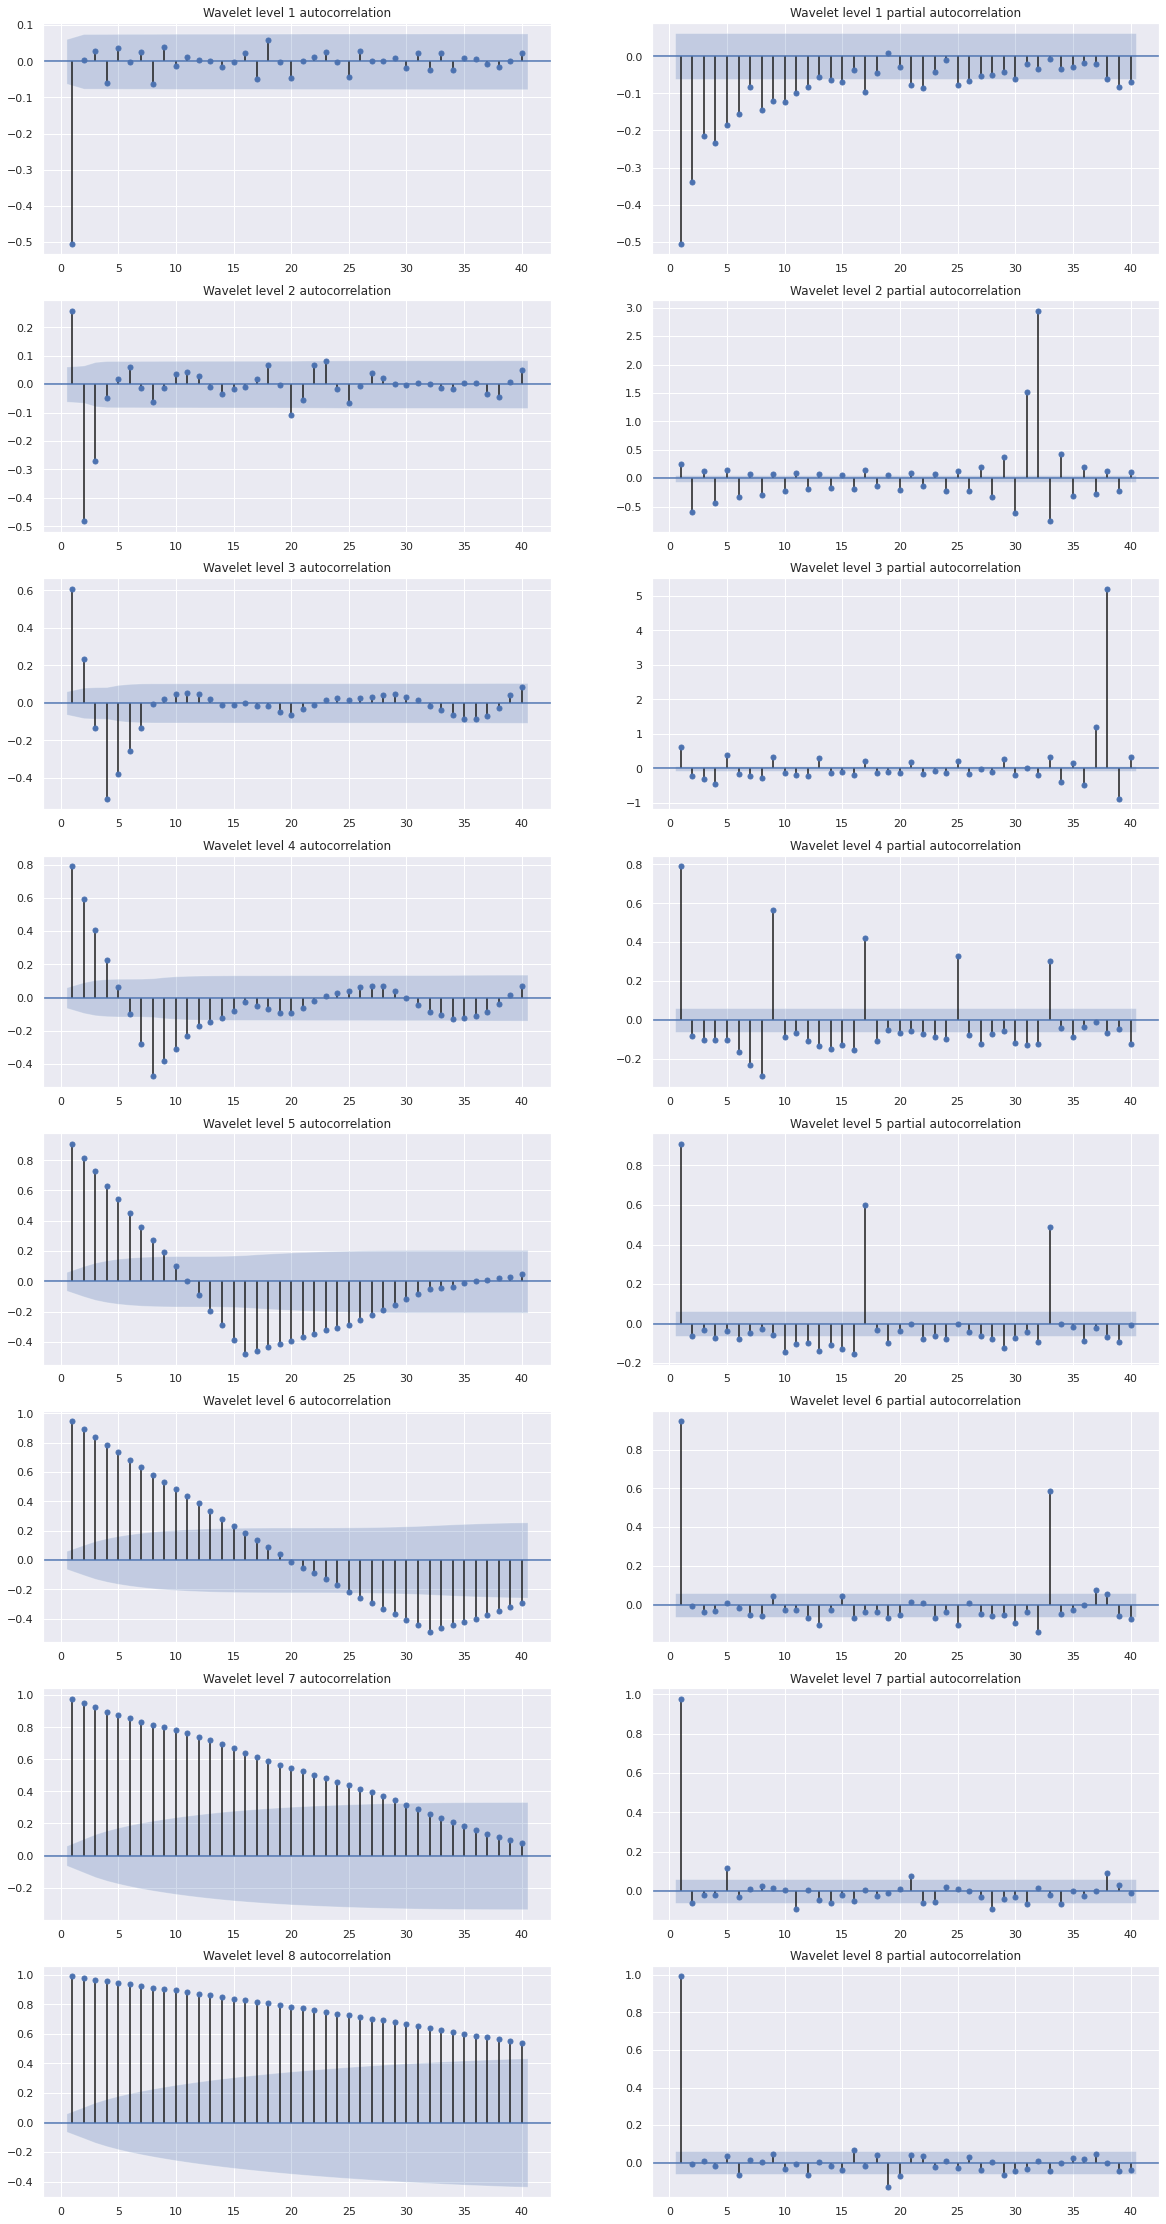

In [20]:
plot.plot_autocorrelation(rets_detail, title_prefix="Wavelet level ")

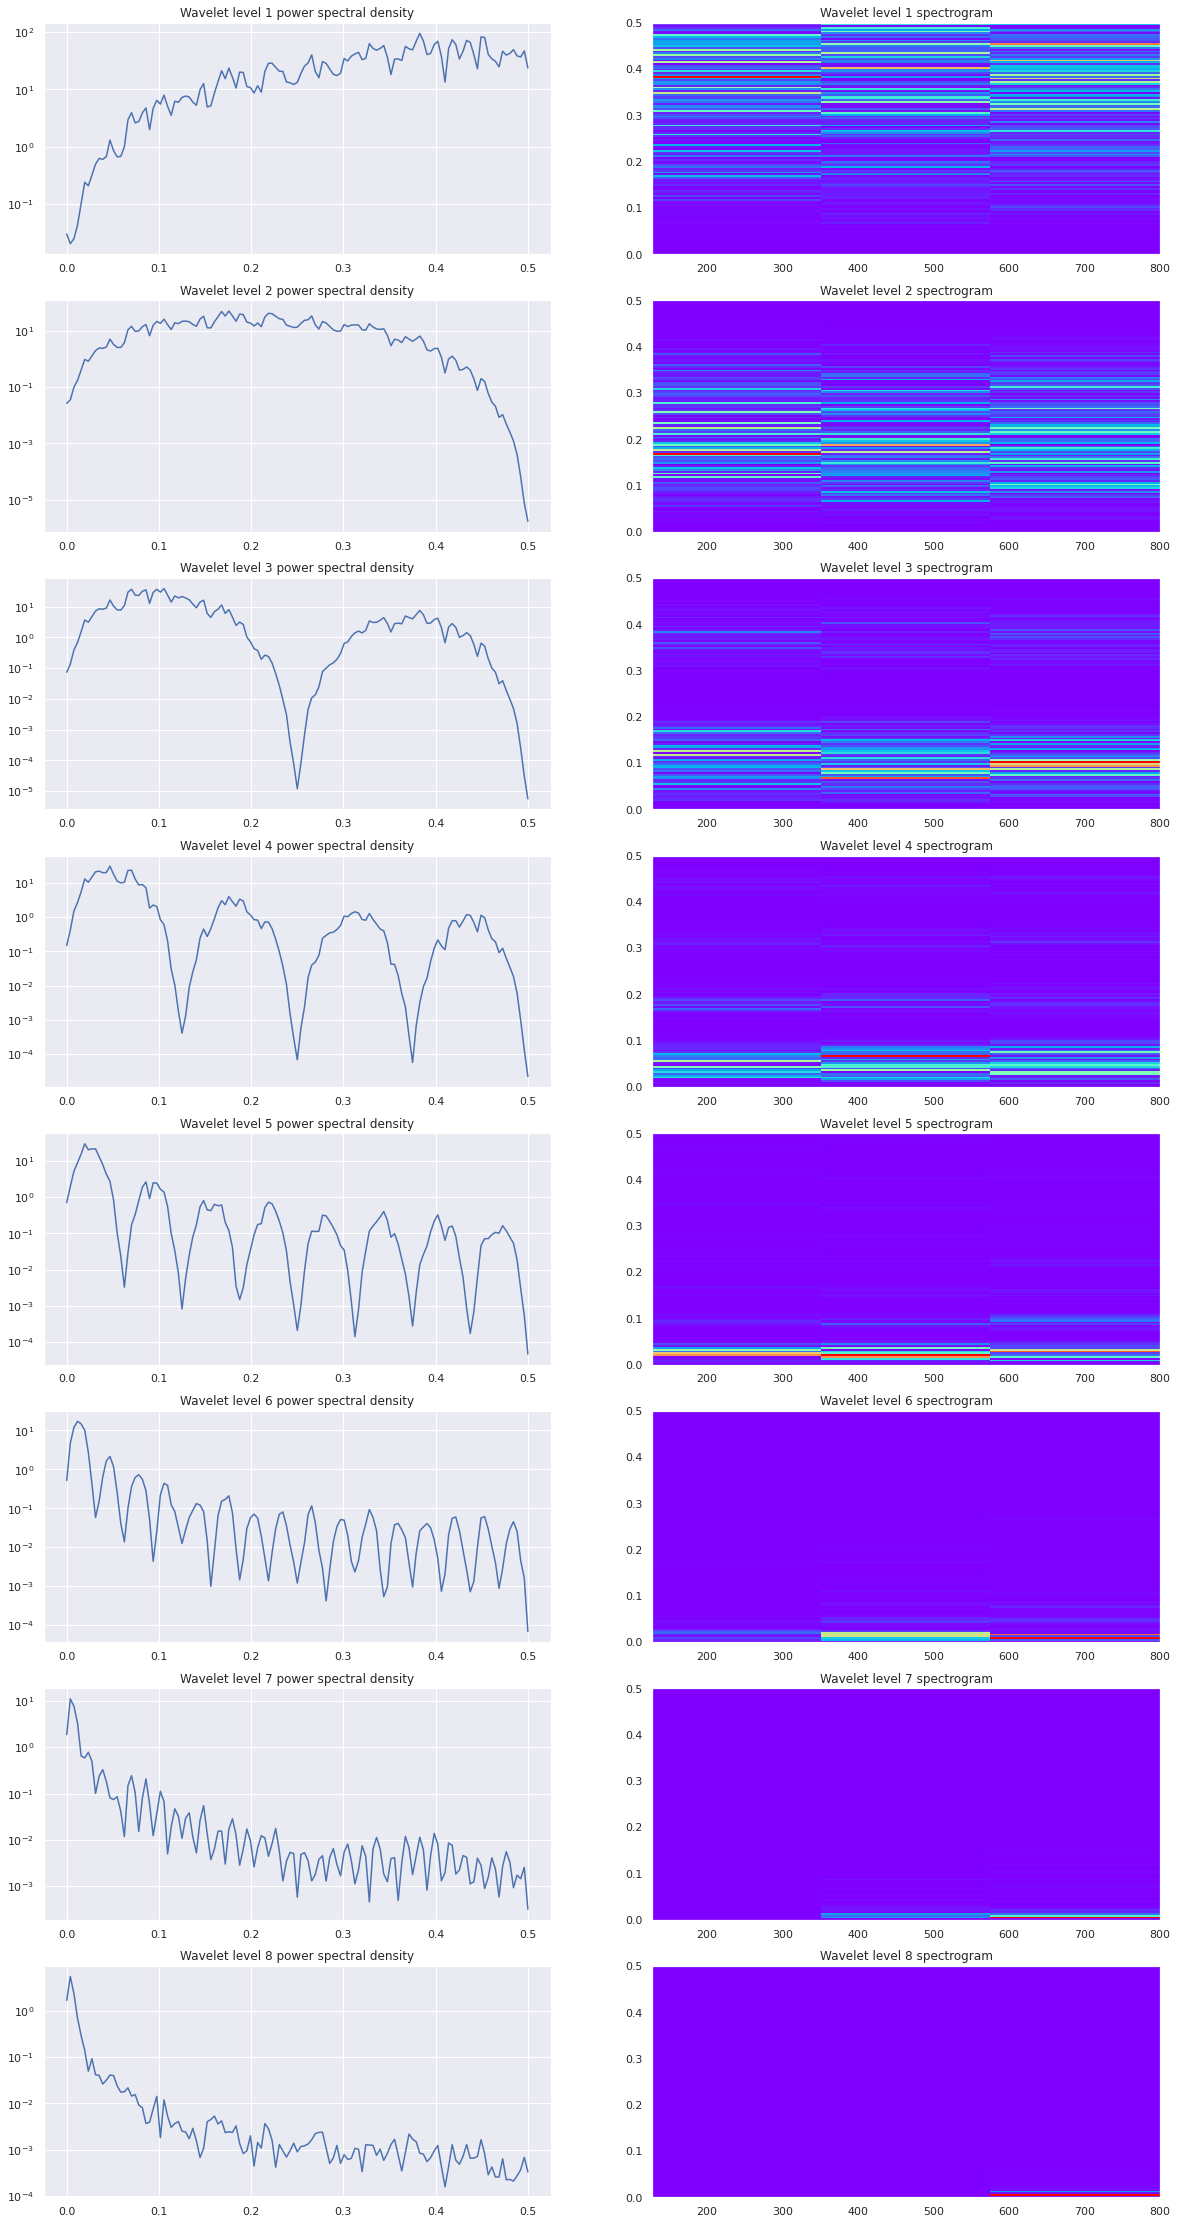

In [21]:
plot.plot_spectrum(rets_detail, title_prefix="Wavelet level ")

,1,2,3,4,5,6,7,8
1,1.000000,-0.005011,0.001973,0.004755,0.000254,0.002984,-0.009899,0.003665
2,-0.005011,1.000000,-0.011876,0.019340,-0.007146,-0.002466,0.000708,0.004726
3,0.001973,-0.011876,1.000000,-0.020874,0.016303,0.015002,0.021832,-0.020744
4,0.004755,0.019340,-0.020874,1.000000,0.012327,-0.012213,-0.018466,-0.021897
5,0.000254,-0.007146,0.016303,0.012327,1.000000,-0.009624,-0.009692,-0.057066
6,0.002984,-0.002466,0.015002,-0.012213,-0.009624,1.000000,0.032968,-0.093402
7,-0.009899,0.000708,0.021832,-0.018466,-0.009692,0.032968,1.000000,0.017977
8,0.003665,0.004726,-0.020744,-0.021897,-0.057066,-0.093402,0.017977,1.000000


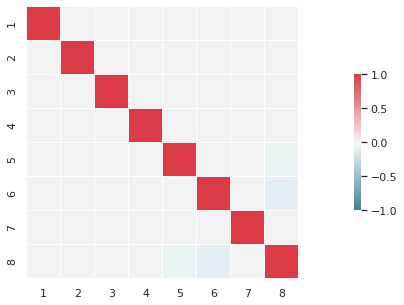

In [22]:
plot.plot_correlation_matrix(rets_detail, mode="heatmap")

### Z-scored returns

In [23]:
zscored_rets = sigp.get_dyadic_zscored(rets, demean=False)

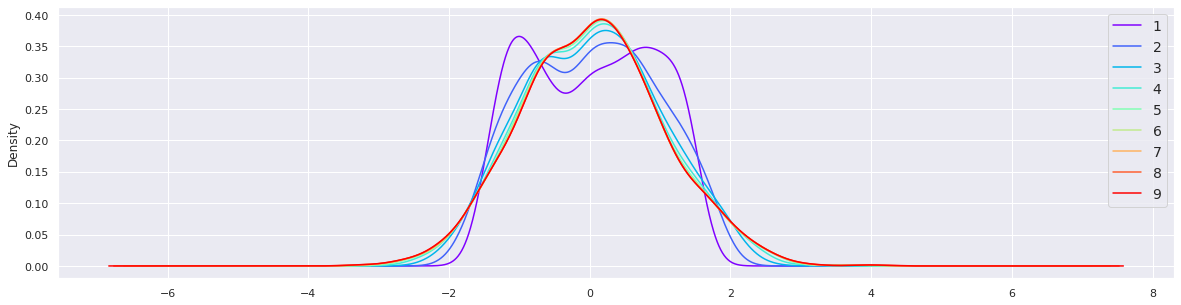

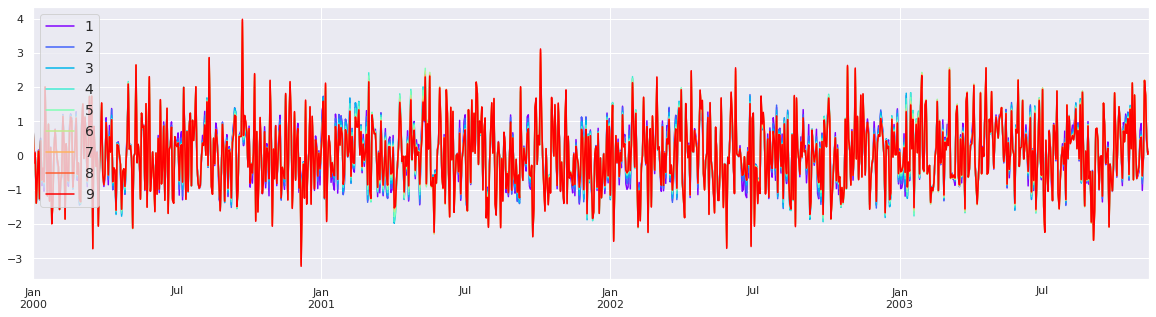

In [24]:
plot.plot_cols(zscored_rets)

In [25]:
stats.apply_normality_test(zscored_rets)

,1,2,3,4,5,6,7,8,9
statistic,1720.885562,1.740875e+02,3.843983e+01,9.976404,3.985779,2.922414,2.666742,2.601597,2.591727
pvalue,0.000000,1.575382e-38,4.496734e-09,0.006818,0.136301,0.231956,0.263587,0.272314,0.273661


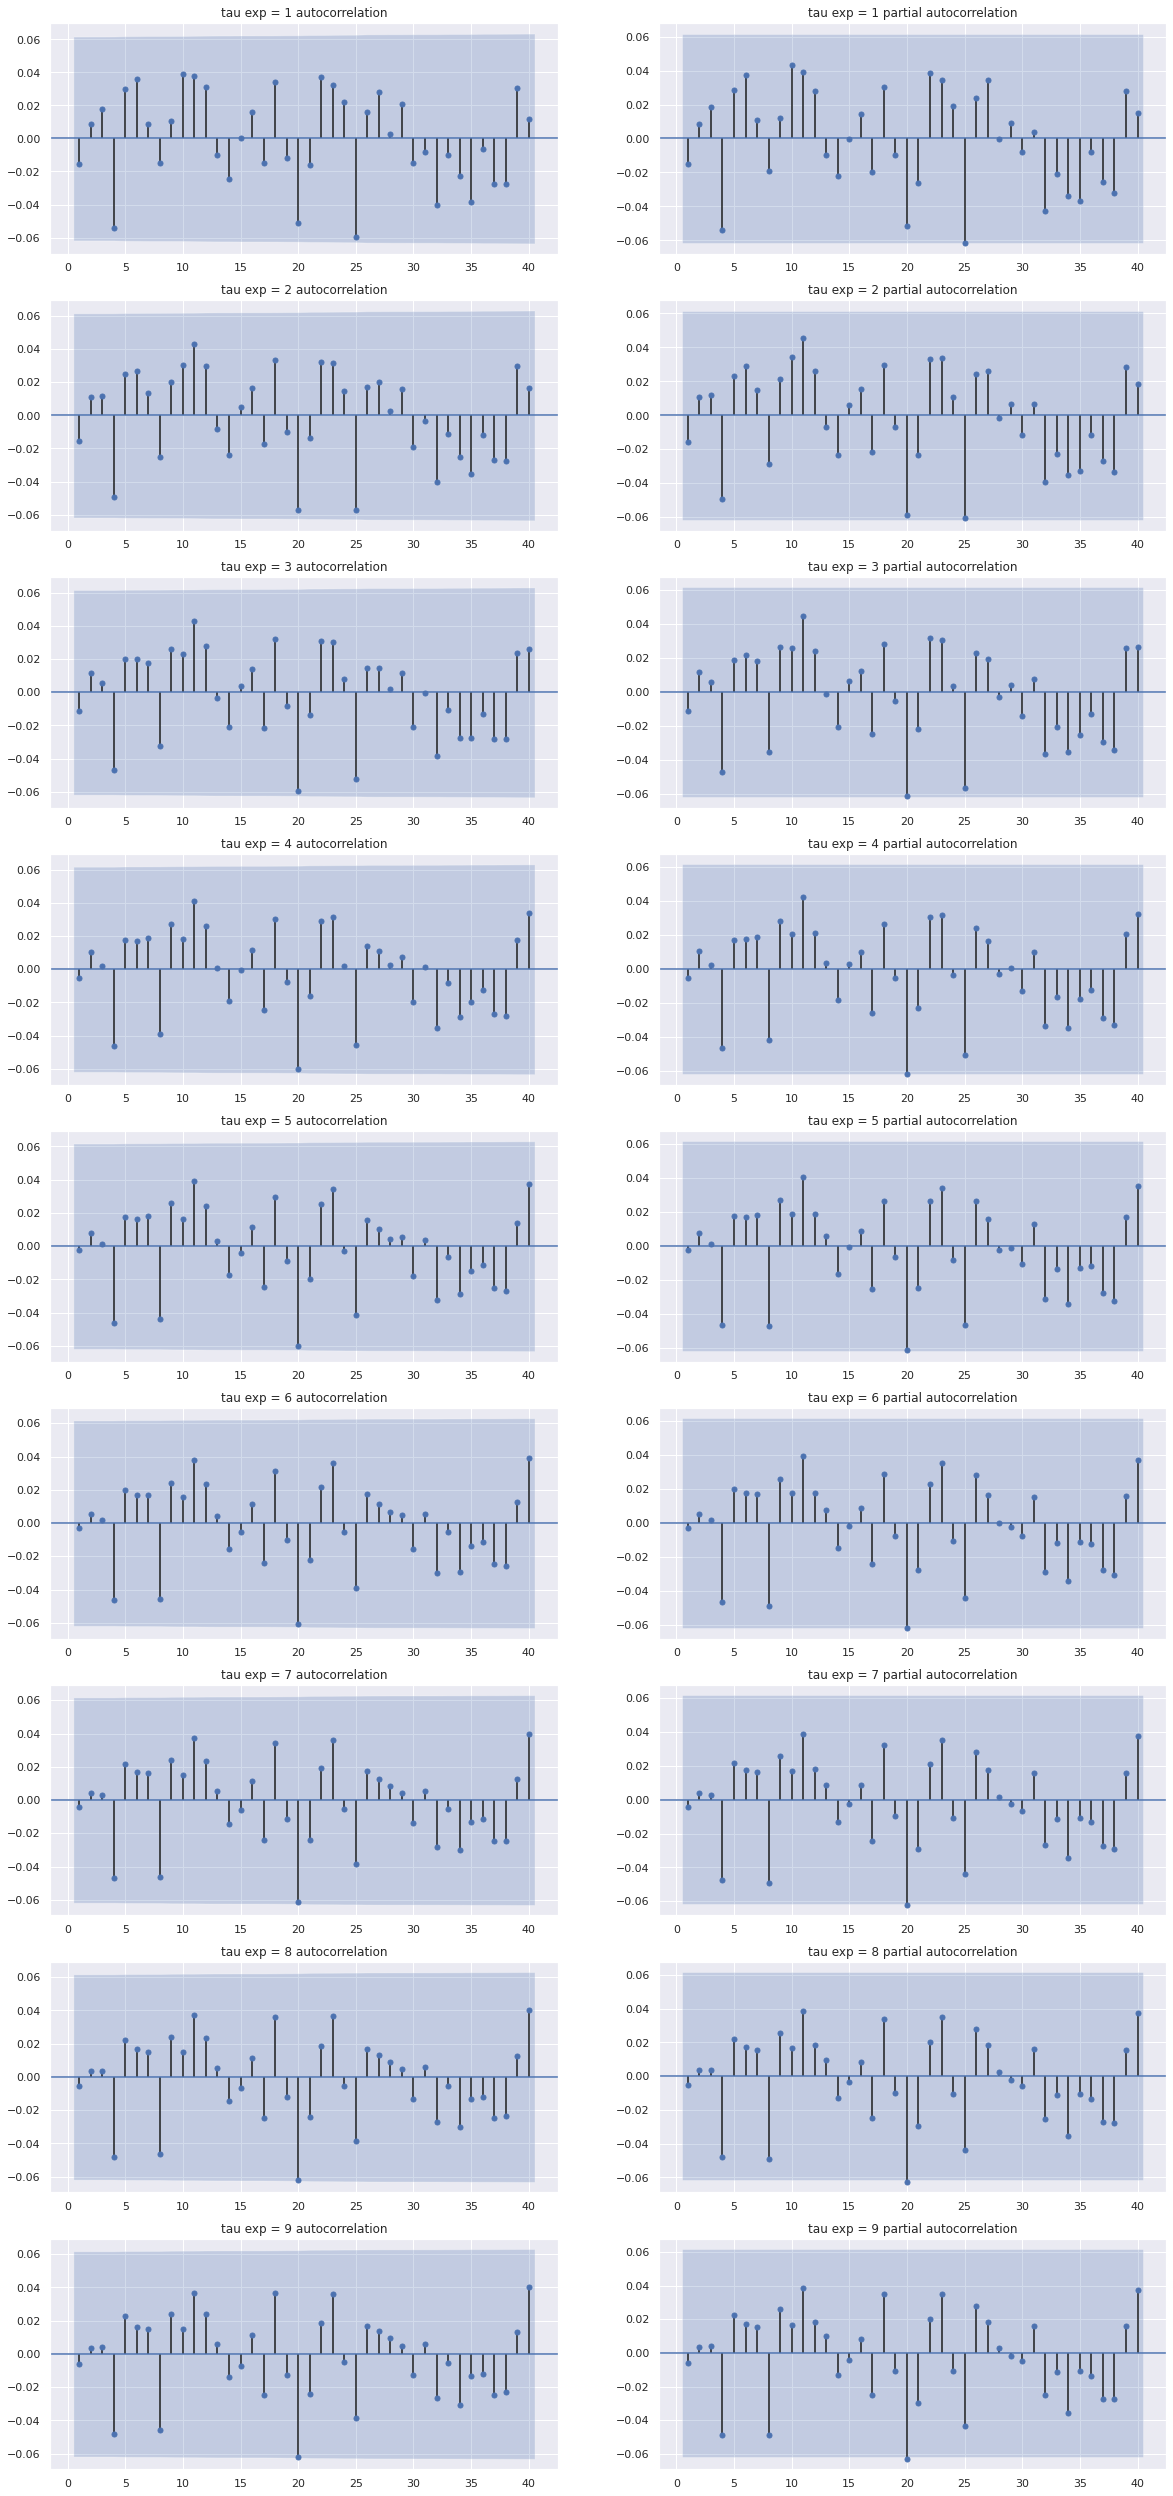

In [26]:
plot.plot_autocorrelation(zscored_rets, title_prefix="tau exp = ")

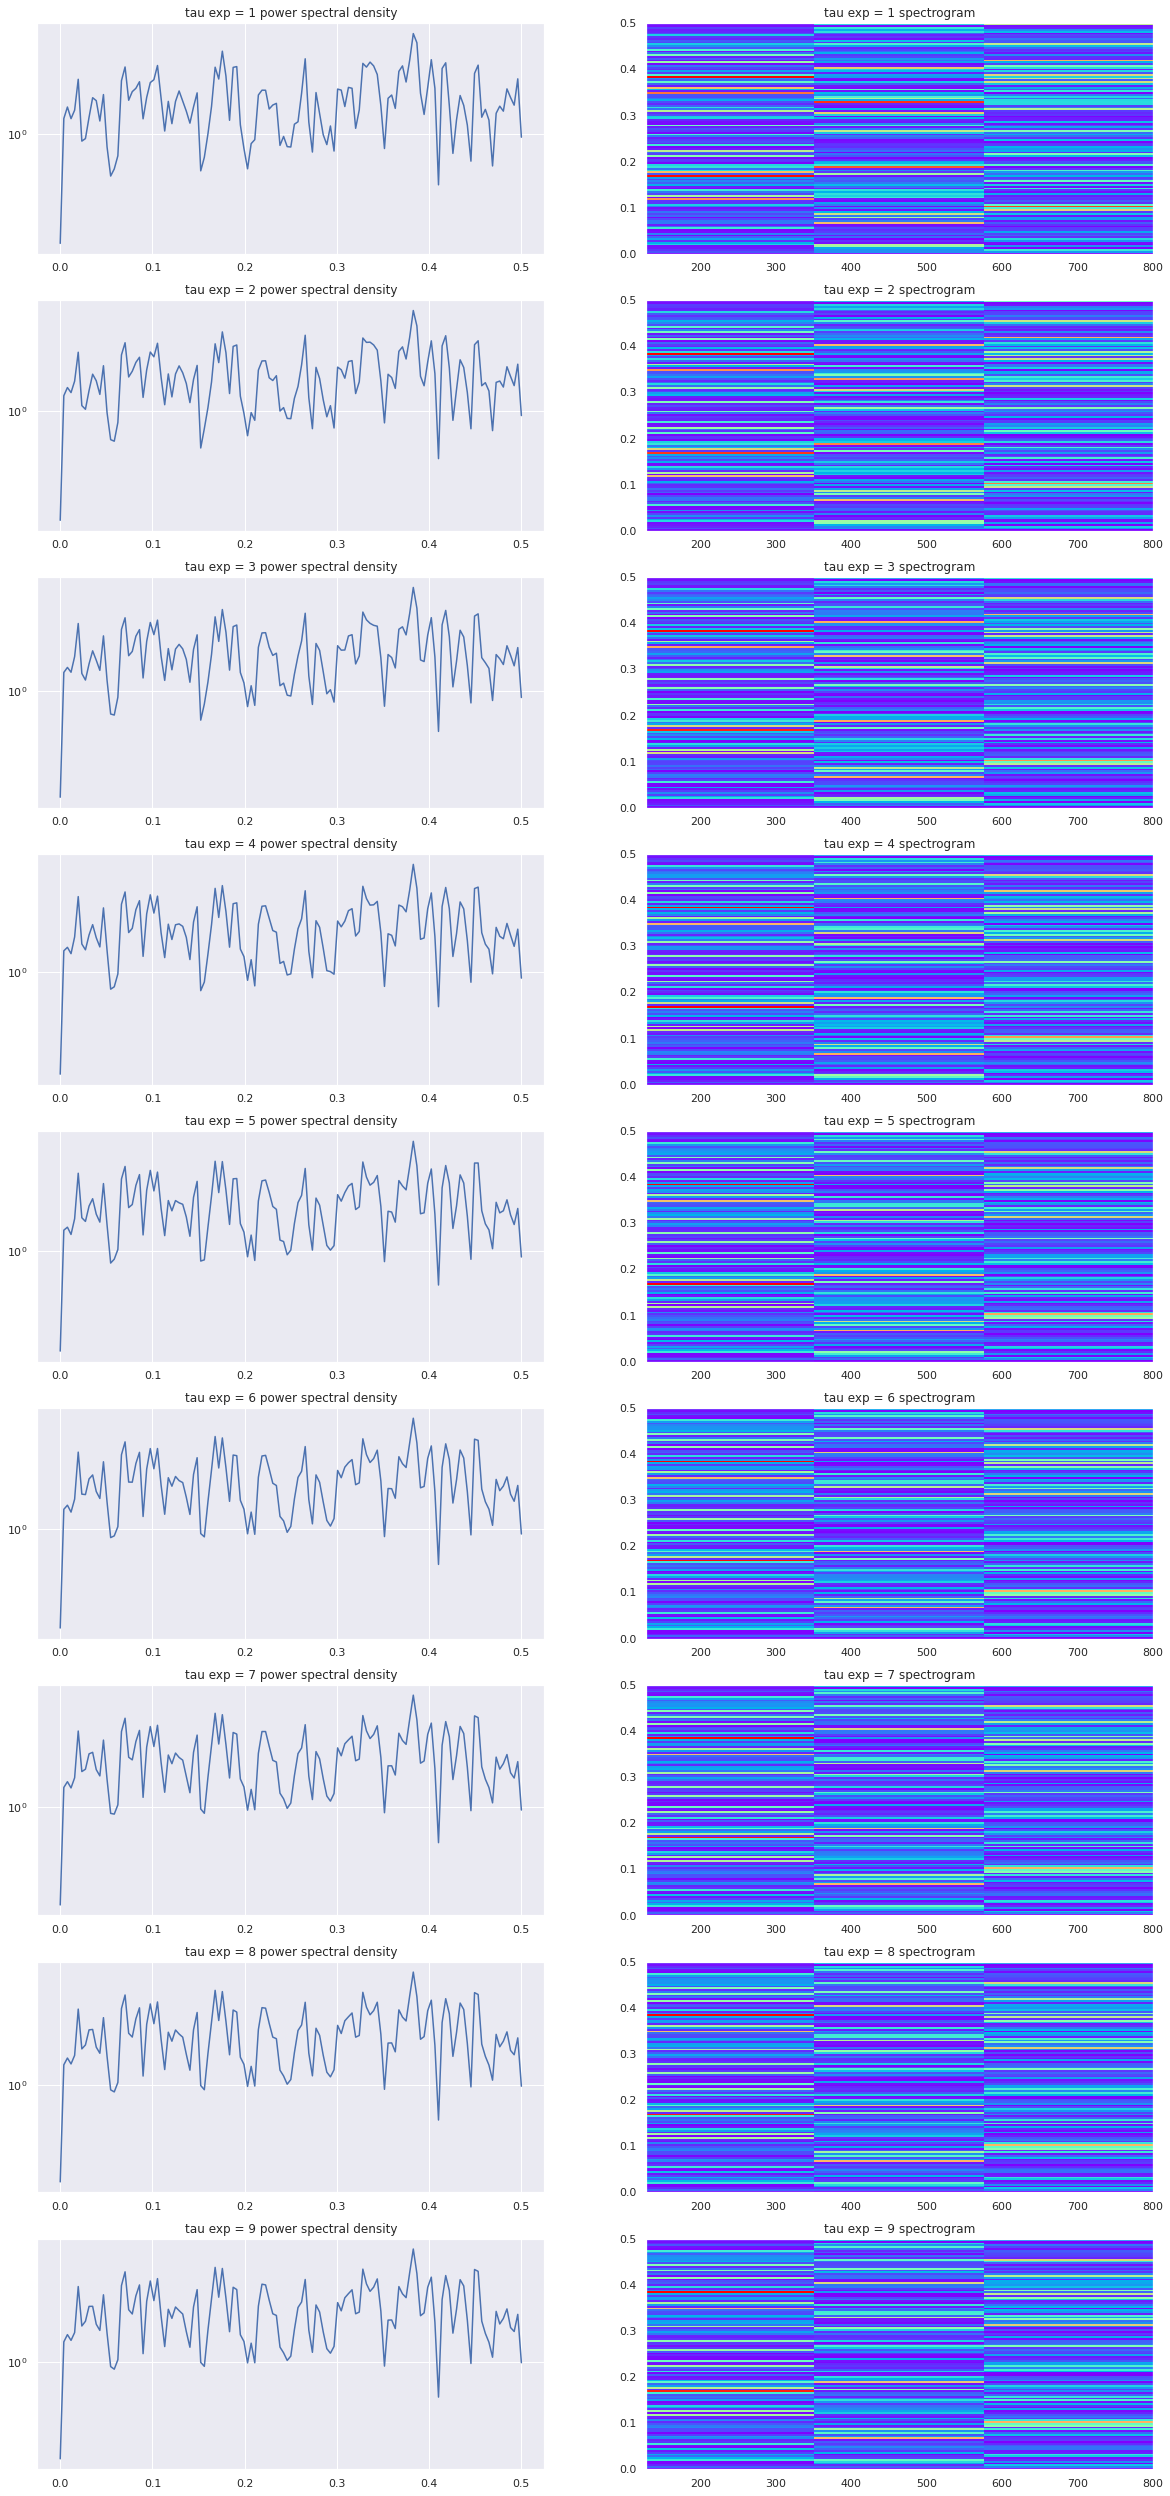

In [27]:
plot.plot_spectrum(zscored_rets, title_prefix="tau exp = ")

# EMAs

In [28]:
impulse = sig_gen.get_impulse(-252, 3 * 252, tick=1)

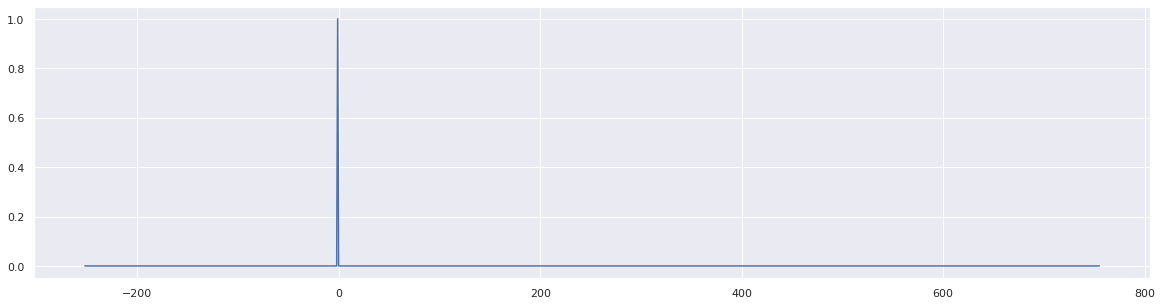

In [29]:
impulse.plot()

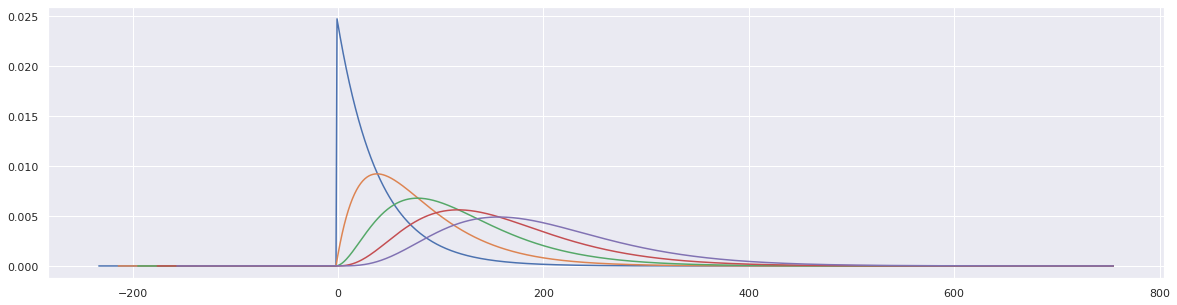

In [30]:
for i in range(1, 6):
    sigp.compute_ema(impulse, tau=40, min_periods=20, depth=i).plot()

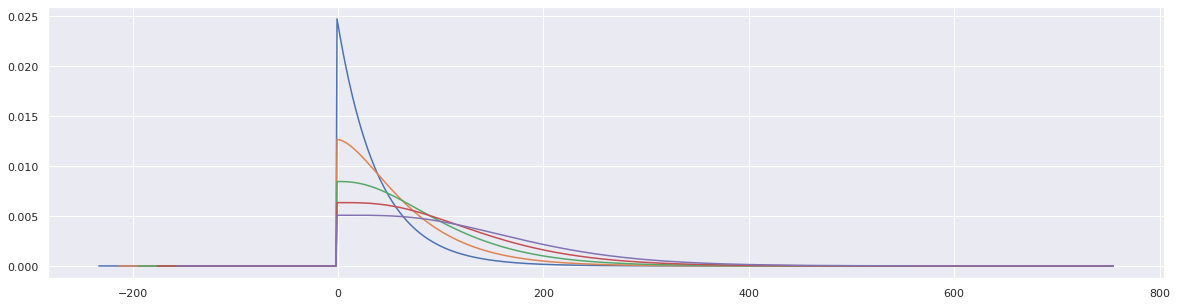

In [31]:
for i in range(1, 6):
    sigp.compute_smooth_moving_average(
        impulse, tau=40, min_periods=20, min_depth=1, max_depth=i
    ).plot()

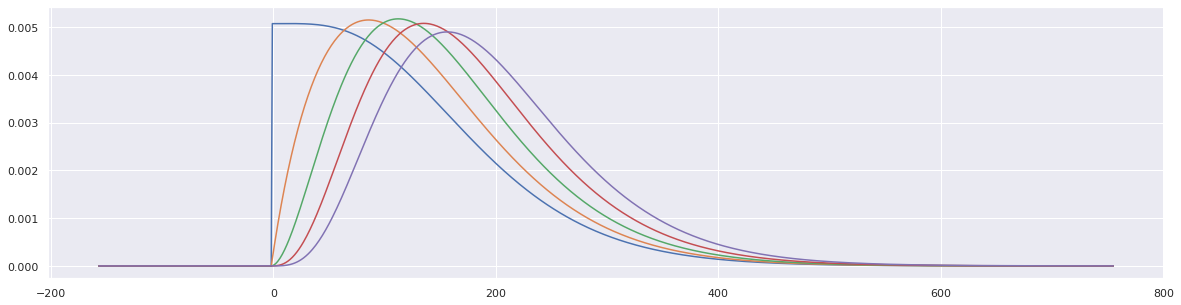

In [32]:
for i in range(1, 6):
    sigp.compute_smooth_moving_average(
        impulse, tau=40, min_periods=20, min_depth=i, max_depth=5
    ).plot()

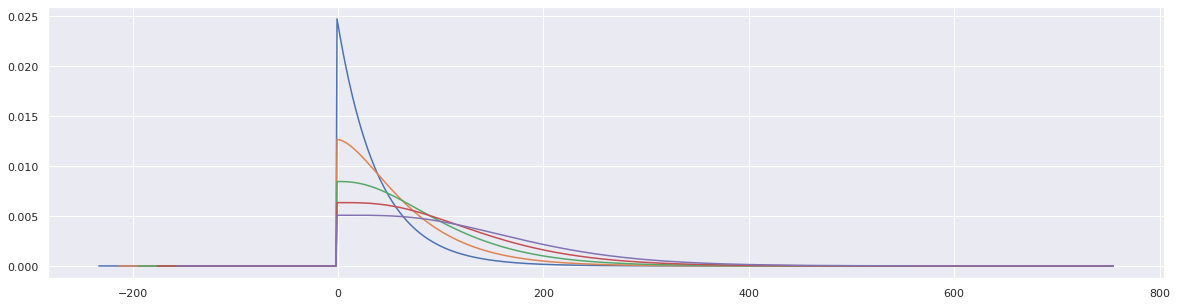

In [33]:
for i in range(1, 6):
    sigp.compute_rolling_norm(
        impulse, tau=40, min_periods=20, min_depth=1, max_depth=i, p_moment=1
    ).plot()

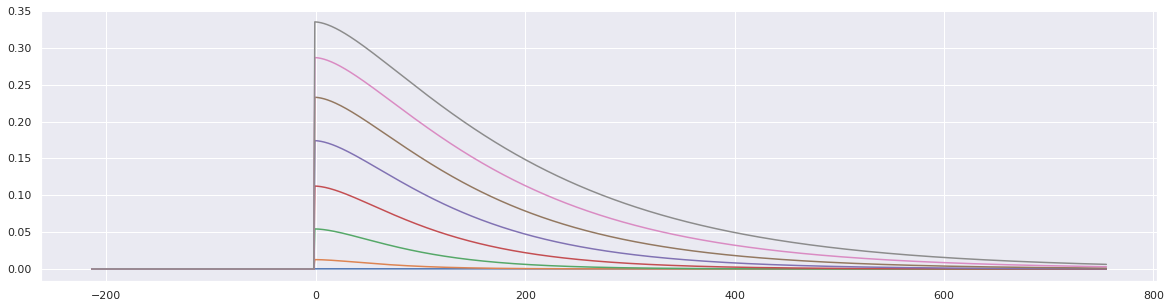

In [34]:
for i in np.arange(0.5, 4.5, 0.5):
    sigp.compute_rolling_norm(
        impulse, tau=40, min_periods=20, min_depth=1, max_depth=2, p_moment=i
    ).plot()

# Outliers handling

[-1.74976547  0.3426804   1.1530358  -0.25243604  0.98132079]


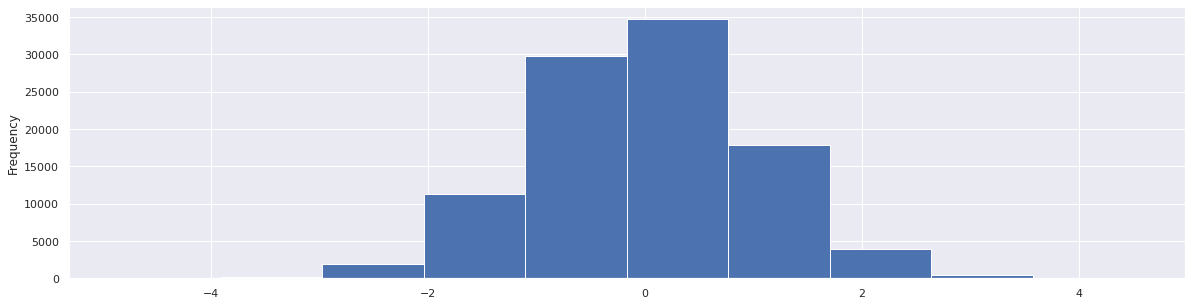

In [35]:
np.random.seed(100)
n = 100000
data = np.random.normal(loc=0.0, scale=1.0, size=n)
print(data[:5])

srs = pd.Series(data)
srs.plot(kind="hist")

In [36]:
def _analyze(srs):
    print(np.isnan(srs).sum())
    srs.plot(kind="hist")
    plt.show()
    pprint.pprint(stats)

0


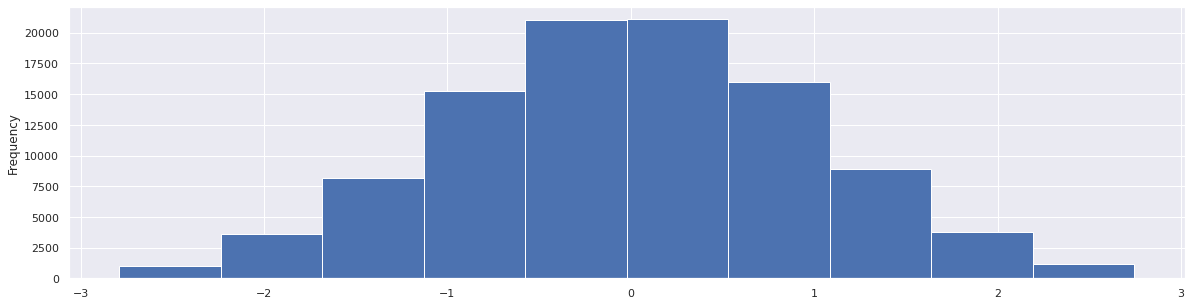

OrderedDict([('series_name', None),
             ('num_elems_before', 100000),
             ('num_nans_before', 0),
             ('num_infs_before', 0),
             ('quantiles', (0.01, 0.99)),
             ('mode', 'winsorize'),
             ('bounds',
                      l_bound   u_bound
0           NaN       NaN
1           NaN       NaN
2           NaN       NaN
3           NaN       NaN
4           NaN       NaN
...         ...       ...
99995 -2.360705  2.370013
99996 -2.360705  2.370013
99997 -2.360705  2.370013
99998 -2.360705  2.370013
99999 -2.360705  2.370013

[100000 rows x 2 columns]),
             ('num_elems_removed', 2036),
             ('num_elems_after', 97964),
             ('percentage_removed', 2.036),
             ('num_nans_after', 0),
             ('num_infs_after', 0)])


In [37]:
mode = "winsorize"
lower_quantile = 0.01
window = 1000
min_periods = 10
stats = collections.OrderedDict()
srs_out = sigp.process_outliers(
    srs, mode, lower_quantile, window=window, min_periods=min_periods, info=stats
)
#
_analyze(srs_out)

0


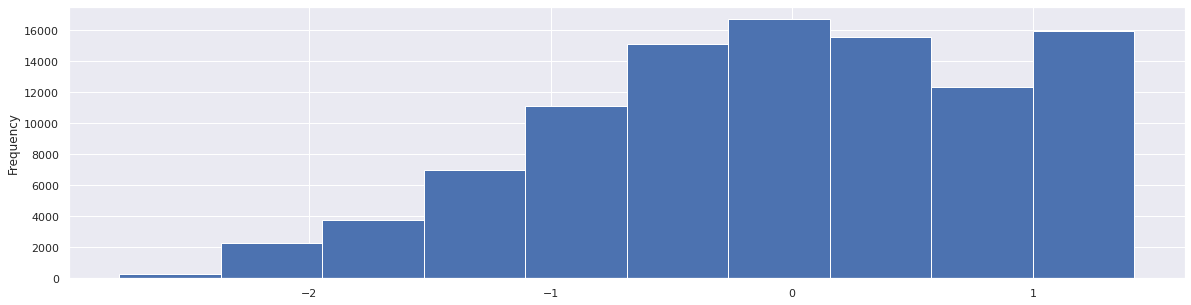

OrderedDict([('series_name', None),
             ('num_elems_before', 100000),
             ('num_nans_before', 0),
             ('num_infs_before', 0),
             ('quantiles', (0.01, 0.9)),
             ('mode', 'winsorize'),
             ('bounds',
                      l_bound   u_bound
0           NaN       NaN
1           NaN       NaN
2           NaN       NaN
3           NaN       NaN
4           NaN       NaN
...         ...       ...
99995 -2.360705  1.185876
99996 -2.360705  1.185876
99997 -2.360705  1.185876
99998 -2.360705  1.185876
99999 -2.360705  1.185876

[100000 rows x 2 columns]),
             ('num_elems_removed', 11031),
             ('num_elems_after', 88969),
             ('percentage_removed', 11.031),
             ('num_nans_after', 0),
             ('num_infs_after', 0)])


In [38]:
mode = "winsorize"
lower_quantile = 0.01
upper_quantile = 0.90
window = 1000
min_periods = 10
stats = collections.OrderedDict()
srs_out = sigp.process_outliers(
    srs,
    mode,
    lower_quantile,
    upper_quantile=upper_quantile,
    window=window,
    min_periods=min_periods,
    info=stats,
)
#
_analyze(srs_out)

2036


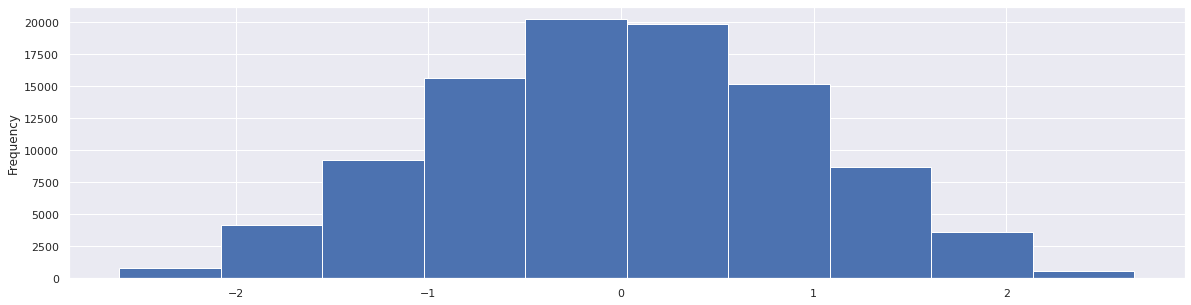

OrderedDict([('series_name', None),
             ('num_elems_before', 100000),
             ('num_nans_before', 0),
             ('num_infs_before', 0),
             ('quantiles', (0.01, 0.99)),
             ('mode', 'set_to_nan'),
             ('bounds',
                      l_bound   u_bound
0           NaN       NaN
1           NaN       NaN
2           NaN       NaN
3           NaN       NaN
4           NaN       NaN
...         ...       ...
99995 -2.360705  2.370013
99996 -2.360705  2.370013
99997 -2.360705  2.370013
99998 -2.360705  2.370013
99999 -2.360705  2.370013

[100000 rows x 2 columns]),
             ('num_elems_removed', 2036),
             ('num_elems_after', 97964),
             ('percentage_removed', 2.036),
             ('num_nans_after', 2036),
             ('num_infs_after', 0)])


In [39]:
mode = "set_to_nan"
lower_quantile = 0.01
window = 1000
min_periods = 10
stats = collections.OrderedDict()
srs_out = sigp.process_outliers(
    srs, mode, lower_quantile, window=window, min_periods=min_periods, info=stats
)
#
_analyze(srs_out)

0


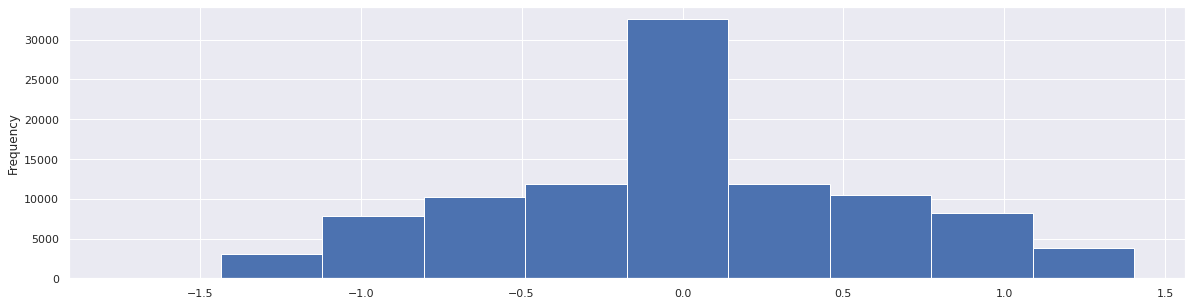

OrderedDict([('series_name', None),
             ('num_elems_before', 100000),
             ('num_nans_before', 0),
             ('num_infs_before', 0),
             ('quantiles', (0.1, 0.9)),
             ('mode', 'set_to_zero'),
             ('bounds',
                      l_bound   u_bound
0           NaN       NaN
1           NaN       NaN
2           NaN       NaN
3           NaN       NaN
4           NaN       NaN
...         ...       ...
99995 -1.332348  1.185876
99996 -1.331786  1.185876
99997 -1.332348  1.185876
99998 -1.331786  1.185876
99999 -1.331786  1.185876

[100000 rows x 2 columns]),
             ('num_elems_removed', 19999),
             ('num_elems_after', 80001),
             ('percentage_removed', 19.999),
             ('num_nans_after', 0),
             ('num_infs_after', 0)])


In [40]:
mode = "set_to_zero"
lower_quantile = 0.10
window = 1000
min_periods = 10
stats = collections.OrderedDict()
srs_out = sigp.process_outliers(
    srs, mode, lower_quantile, window=window, min_periods=min_periods, info=stats
)
#
_analyze(srs_out)